# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

In [3]:
lab5_df = pd.read_csv("./winequality_red.csv")
lab5_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# target attribute
target_attribute_name = 'quality'
target = lab5_df[target_attribute_name]

# predictor attributes
predictors = lab5_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [4]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [5]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[4 1 7 6 2 9 3 5 8 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [6]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False  True False False False  True]
[4 1 5 9 8 6 1 3 7 2 1]


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [7]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [8]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [9]:
classifier = svm.SVC()

In [10]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.609375

In [11]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.603125

In [12]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.590625

## C. Conclusion
My initial result is that using Linear regression results in the best accuracy. I will now run the experiment multiple times with different training/test stratified splits.

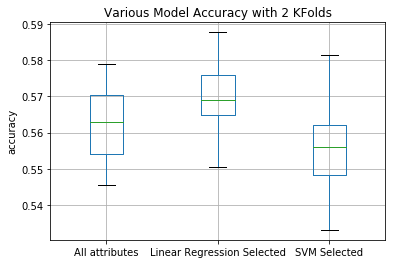

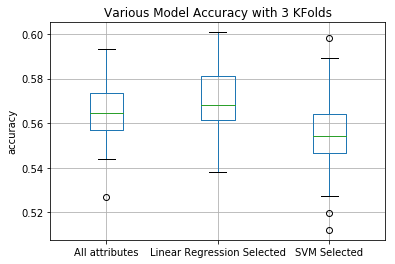

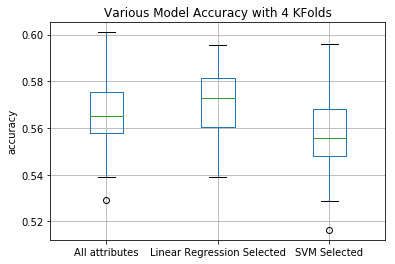

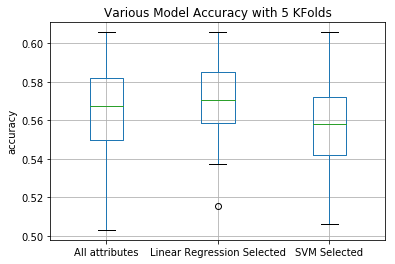

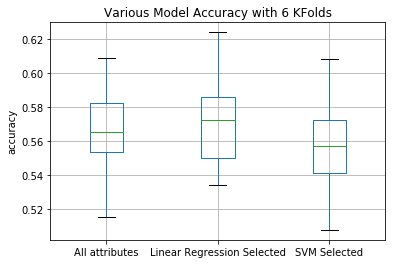

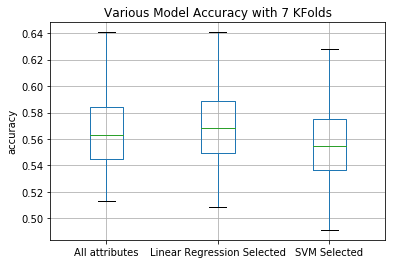

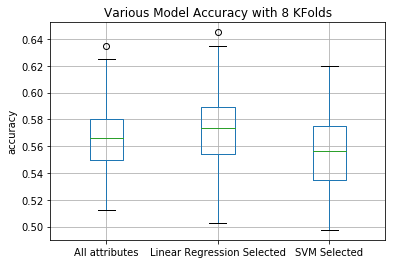

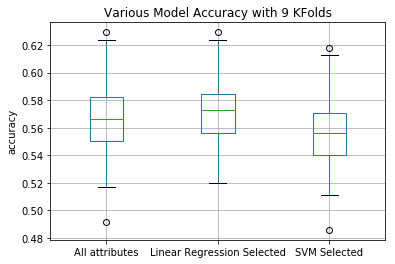

In [24]:
# pepare independent stratified data sets for training and test of the final model
for i in range(2,10):
    m1_scores = []
    m2_scores = []
    m3_scores = []
    for j in range(10):
        skf = StratifiedKFold(n_splits=i, shuffle=True)
        skf.get_n_splits(predictors, target)
        for train_index, test_index in skf.split(predictors, target):
            predictors_train, predictors_test = predictors[train_index], predictors[test_index]
            target_train, target_test = target[train_index], target[test_index]
            predictors_train_SVMselected = selectorSVM.transform(predictors_train)
            predictors_test_SVMselected = selectorSVM.transform(predictors_test)
            predictors_train_LRselected = selectorLR.transform(predictors_train)
            predictors_test_LRselected = selectorLR.transform(predictors_test)
            classifier = svm.SVC()
            model1 = classifier.fit(predictors_train_SVMselected, target_train)
            m1_scores.append(model1.score(predictors_test_SVMselected, target_test))
            model2 = classifier.fit(predictors_train_LRselected, target_train)
            m2_scores.append(model2.score(predictors_test_LRselected, target_test))
            model3 = classifier.fit(predictors_train, target_train)
            m3_scores.append(model3.score(predictors_test, target_test))
    
    df = pd.DataFrame({
        'SVM Selected': m1_scores,
        'Linear Regression Selected' : m2_scores,
        'All attributes' : m3_scores
    })
    df.boxplot()
    plt.title("Various Model Accuracy with {} KFolds".format(i))
    plt.ylabel("accuracy")
    plt.show()

### Conclusion

The results in Task 2 are within the range provided in our boxplots of models, it is however on the higher end of our accuracy. I can surmise that when we increase the number of KFolds we also increase the number of outliers in our accuracy performance (Taking smaller groups it becomes more likely we will randomly select a small group which matches our hypothesis.) The average score seems to stay fairly stable irregardless of the number of folds we use.

Once again Linear model seems to perform the best having the highest average score as well as the smallest variance in scores.

(1599, 11)

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion

# create feature union

p1_results = []

for i in range(1,12):
    features = []
    features.append(('select_best', SelectKBest(k=i)))
    feature_union = FeatureUnion(features)

    estimators = []
    estimators.append(('scaler', preprocessing.MinMaxScaler()))
    estimators.append(('feature_selection', feature_union))
    estimators.append(('model', LogisticRegression()))
    model = Pipeline(estimators)

    seed = 7
    kfold = KFold(n_splits=5, random_state=seed)
    p1_result = cross_val_score(model, predictors, target, cv=kfold)
    p1_results.append(p1_result)

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion

# create feature union
features = []
features.append(('pca', PCA()))
features.append(('select_best', RFECV(svm.SVR(kernel="linear"), step=2, cv=5)))
feature_union = FeatureUnion(features)

estimators = []
estimators.append(('scaler', preprocessing.MinMaxScaler()))
estimators.append(('feature_selection', feature_union))
estimators.append(('model', LogisticRegression()))
model = Pipeline(estimators)

seed = 7
kfold = KFold(n_splits=5, random_state=seed)
p2_results = cross_val_score(model, predictors, target, cv=kfold)
print(p2_results.mean())

0.5691438087774295


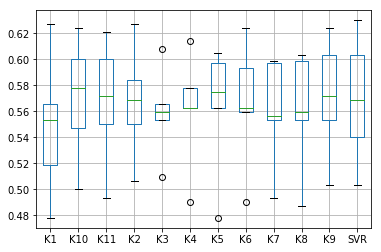

In [123]:
k_fold_pipelines = {}
for i, value in enumerate(p1_results):
    k_fold_pipelines["K{}".format(i+1)] = value
    
k_fold_pipelines["SVR"] = p2_results    
pipeline_df = pd.DataFrame(k_fold_pipelines)


pipeline_df.boxplot()

I have created two pipelines:

pipeline_1: This pipeline uses a minMaxScaler (scales all values to be between 0 and 1) and uses SelectKBest for feature selection. SelectKBest works by computing the ANOVA F-value for the provided sample (The explained variance over the unexplained variance). The final model is the logstic regression of the k best features. I have also reran the pipeline with different values for k. 

pipeline_2: This pipline also uses the minMaxScaler but it uses PCA and linear RFECV for the feature selection. RFECV is uses feature ranking with recursive feature elimination and cross-validated selection of the best number of features. The estimator used aas an SVR (Support vector machine regression). The final model is once again a logistic regression but no additional paramters are tested

